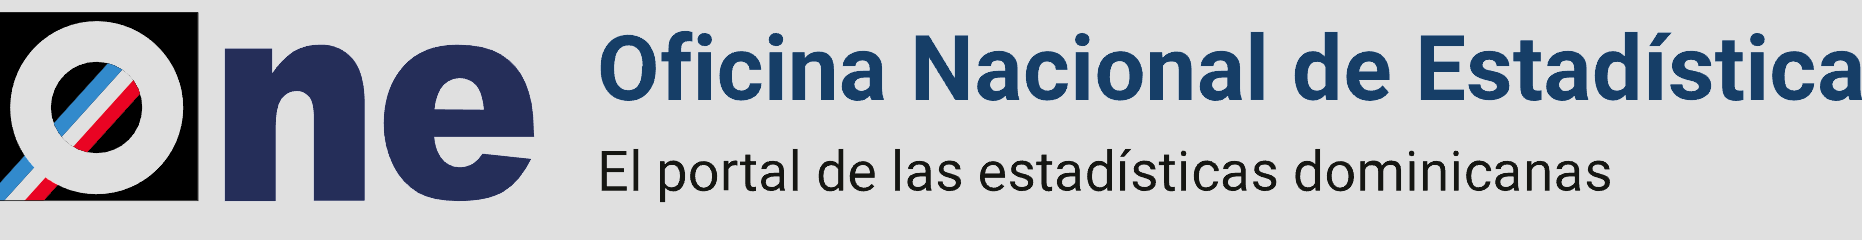
# Obtención de los Reportes en Excel de la ONE a través de Jupyter Notebook Python (Importaciones 2023)

In [1]:
import pandas as pd
import numpy as np
from one_report import dataframe_one
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    """
    Envuelve los textos de las etiquetas del eje x de un gráfico en varias líneas si son demasiado largos.

    Parámetros:
        - ax (matplotlib.axes.Axes): El objeto de ejes sobre el que se aplicarán las etiquetas envueltas.
        - width (int): Ancho máximo deseado para cada línea de texto envuelto.
        - break_long_words (bool): Indica si se deben romper las palabras largas o no. Por defecto, es False.

    Retorna:
        None
    """
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)


In [2]:
df = dataframe_one("Importaciones", 2023)

d:\Python\one_report.py:28: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


Generando el DataFrame


In [3]:
print(dataframe_one.__doc__)


    Esta función extrae datos de un archivo Excel alojado en el sitio web de ONE (Oficina Nacional de Estadística) de la República Dominicana.
    Se requiere especificar el nombre de la tabla de interés y el año de interés para seleccionar los datos adecuados del archivo.

    Parámetros:
        - tabla_interes (str): El nombre de la tabla de interés. Por defecto es "Importaciones".
        - año_interes (int): El año de interés para seleccionar los datos adecuados. Por defecto es 2024.
        - url(str): URL del archivo a leer en formato xlsx. Si se proporciona, se ignora el nombre de la tabla y el año de interés.
    Returns:
        Un diccionario de DataFrames con las hojas de Excel seleccionadas según los parámetros especificados.
    


Estaríamos obteniendo un DataFrame compuesto por el Excel completo del archivo .xlsx consultado.

Con la función .keys() tendríamos una visualización de los nombres de las Hojas o Sheets del archivo leído. Y si se desea consultar o utilizar una hoja específica se deberá hacerlo como si de una columna de un DataFrame se tratara, obteniendo el DataFrame correspondiente.

In [4]:
df.keys()

dict_keys(['IMP_2023_WEB'])

De esta forma, estaríamos guardando la información que se encuentra en el archivo exportado de .xlsx para su manipulación y uso.

In [5]:
importaciones_2023 = df["IMP_2023_WEB"]
importaciones_2023.head(3)

,Transacción,Año,Mes,Cod_Seccion,Desc_Seccion,Cod_Capitulo,Desc_Capitulo,Cod_Partida,Desc_Partida,Cod_Arancel,...,Grupo_economico,Destino_economico,Via_Transporte,Colecturia_ID,Colecturia,Regimen_Aduanero,Tipo_Dato,Peso,V_FOB_USD,V_CIF_USD
0,Importación,2023,1,1,Animales vivos y productos del reino animal.,1,Animales vivos.,101,"Caballos, asnos, mulos y burdéganos, vivos.",0101.21.00,...,Bienes de Capital,Para la Agricultura,Por vía aérea,2050,"Aeropuerto Internacional de Las Américas, José Francisco Peña Gómez (SDQ), Santo Domingo",03 Otros¹,1,"2,250.00","20,000.00","24,400.00"
1,Importación,2023,1,1,Animales vivos y productos del reino animal.,1,Animales vivos.,105,"Gallos, gallinas, patos, gansos, pavos (gallipavos) y pintadas, delas especies domésticas, vivos.",0105.94.10,...,Bienes de Capital,Para la Agricultura,Por vía aérea,2050,"Aeropuerto Internacional de Las Américas, José Francisco Peña Gómez (SDQ), Santo Domingo",01 Nacional,1,778.00,"323,508.40","371,444.37"
2,Importación,2023,1,1,Animales vivos y productos del reino animal.,2,Carne y despojos comestibles.,201,"Carne de animales de la especie bovina, fresca o refrigerada.",0201.20.10,...,Materias Primas,Para la Industria alimenticia (sin elaborar),Por vía marítima,1030,Haina Oriental,01 Nacional,1,"19,908.73","317,173.68","336,457.98"


En este ejemplo, estaríamos explorando el $DataFrame$ de las Importaciones de la República Dominicana para el 2023.

Como primer paso, se realizara un `.info()` del $DataFrame$, para observar como se encuentra compuesto el mismo.

Como se aprecia este $DataFrame$, posee ciertas columnas que en el nombre contiene la palabra $Cod\_$, $\_ID$ y $Tipo\_ Dato$, esto corresponde a código de la variable en sí, procederemos a deseleccionar dichas variables, con el objetivo de quedarnos con las variables tanto categóricas como numéricas.

In [6]:
importaciones_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597471 entries, 0 to 597470
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Transacción           597471 non-null  object 
 1   Año                   597471 non-null  int64  
 2   Mes                   597471 non-null  int64  
 3   Cod_Seccion           597471 non-null  int64  
 4   Desc_Seccion          597471 non-null  object 
 5   Cod_Capitulo          597471 non-null  int64  
 6   Desc_Capitulo         597471 non-null  object 
 7   Cod_Partida           597471 non-null  int64  
 8   Desc_Partida          597471 non-null  object 
 9   Cod_Arancel           597471 non-null  object 
 10  Desc_Arancel          597471 non-null  object 
 11  Cod_Pais              597471 non-null  int64  
 12  Pais_Origen           597471 non-null  object 
 13  Cod_Pais_Procedencia  597471 non-null  int64  
 14  Pais_Procedencia      597471 non-null  object 
 15  

In [7]:
# Deseleccionar columnas que contienen "Cod_" y "Colecturia_ID" y "Tipo_Dato"
importaciones_2023 = importaciones_2023.drop(columns=importaciones_2023.columns[importaciones_2023.columns.str.contains('Cod_|_ID|Tipo_Dato')])
importaciones_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597471 entries, 0 to 597470
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transacción        597471 non-null  object 
 1   Año                597471 non-null  int64  
 2   Mes                597471 non-null  int64  
 3   Desc_Seccion       597471 non-null  object 
 4   Desc_Capitulo      597471 non-null  object 
 5   Desc_Partida       597471 non-null  object 
 6   Desc_Arancel       597471 non-null  object 
 7   Pais_Origen        597471 non-null  object 
 8   Pais_Procedencia   597471 non-null  object 
 9   Estado             597471 non-null  object 
 10  Region             597471 non-null  object 
 11  Continente         597471 non-null  object 
 12  Grupo_economico    597471 non-null  object 
 13  Destino_economico  597471 non-null  object 
 14  Via_Transporte     597471 non-null  object 
 15  Colecturia         597471 non-null  object 
 16  Re

Se utiliza el método `.describe()` para obtener estadísticas descriptivas de las variables numéricas en el DataFrame.

In [8]:
importaciones_2023.describe()

,Año,Mes,Peso,V_FOB_USD,V_CIF_USD
count,"597,471.00","597,471.00","597,471.00","597,471.00","597,471.00"
mean,"2,023.00",6.57,"37,015.97","48,590.13","52,481.88"
std,0.00,3.42,"1,237,192.92","645,461.74","671,675.11"
min,"2,023.00",1.00,0.00,0.00,-0.71
25%,"2,023.00",4.00,5.73,255.25,315.73
50%,"2,023.00",7.00,68.76,"1,572.18","1,825.64"
75%,"2,023.00",10.00,850.77,"10,471.68","11,723.01"
max,"2,023.00",12.00,"314,848,212.53","116,458,364.50","119,430,071.00"


Se utiliza el método .shape para obtener la forma del DataFrame, es decir, el número de filas y columnas.

In [9]:
importaciones_2023.shape

(597471, 20)

Durante el periodo 2023, los principales socios comerciales en las importaciones de la República Dominicana son Estados Unidos, China, Brasil, México y España, siendo Estados Unidos el más influyente con un 40.94% del valor total de las importaciones del país, equivalente a 12,746.06 millones de dólares, seguido de China, representando el 16.39% de las importaciones del país, equivalente a 4,758.71 millones de dólares.


In [10]:
# Calcular la suma de los valores de V_FOB_USD y V_CIF_USD para cada país de origen
pais_origen = importaciones_2023.pivot_table(index="Pais_Origen", values={"V_FOB_USD", "V_CIF_USD"}, aggfunc=np.sum).reset_index()

# Seleccionar los 10 principales países por valor FOB y calcular el total de los demás países
top_10_country = pais_origen.sort_values("V_FOB_USD", ascending=False).head(10)
other_country = pais_origen.sort_values("V_FOB_USD", ascending=True).head(-10)

# Calcular el resumen de países de origen, incluyendo el total de otros países
pais_origen_resumen = top_10_country.append(pd.DataFrame(data={"Pais_Origen": ["Otros"],
                                                               "V_FOB_USD": [other_country["V_FOB_USD"].sum()],
                                                               "V_CIF_USD": [other_country["V_CIF_USD"].sum()]}))

# Calcular los porcentajes de los valores FOB y CIF para cada país de origen y otros
pais_origen_resumen["V_FOB_USD_%"] = 100 * (pais_origen_resumen["V_FOB_USD"] / pais_origen_resumen["V_FOB_USD"].sum())
pais_origen_resumen["V_CIF_USD_%"] = 100 * (pais_origen_resumen["V_CIF_USD"] / pais_origen_resumen["V_CIF_USD"].sum())

# Mostrar el resumen de países de origen
pais_origen_resumen

,Pais_Origen,V_CIF_USD,V_FOB_USD,V_FOB_USD_%,V_CIF_USD_%
53,Estados Unidos de América,"12,746,064,077.81","11,885,257,598.34",40.94,40.65
35,China,"5,189,210,815.91","4,758,705,458.06",16.39,16.55
24,Brasil,"1,214,621,304.37","1,111,130,506.70",3.83,3.87
119,México,"1,175,713,738.97","1,088,546,384.57",3.75,3.75
50,España,"1,169,527,247.02","1,067,674,182.62",3.68,3.73
92,Italia,"976,665,367.15","930,416,268.89",3.20,3.11
37,Colombia,"709,119,549.45","659,925,238.92",2.27,2.26
1,Alemania,"551,827,831.85","518,637,085.09",1.79,1.76
94,Japón,"573,175,844.49","518,537,258.70",1.79,1.83
75,India,"495,271,573.54","455,220,480.30",1.57,1.58


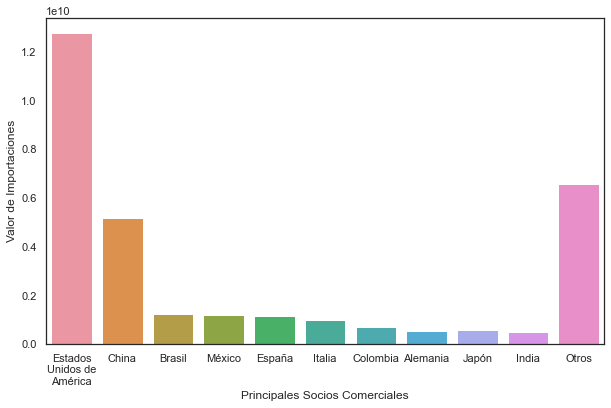

In [11]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")

# Crear el gráfico de barras
graf = sns.barplot(data=pais_origen_resumen, x="Pais_Origen", y="V_CIF_USD")

# Establecer etiquetas para los ejes x e y
graf.set(xlabel="Principales Socios Comerciales", ylabel="Valor de Importaciones")

# Envolver las etiquetas del eje x para mejorar la legibilidad
wrap_labels(graf, 10)
